# USO ETF Price Prediction with PCA and Regression

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import seaborn as sns
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [4]:
# USO_ETF

In [5]:
df_final = pd.read_csv("/Users/katerina/Documents/Ironhack/USO_ETF/Ready Datasets/USO_ETF.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [6]:
df_final

,XOM_Open,XOM_Close,XOM_High,XOM_Low,XOM_Adj_Close,XOM_Volume,BZ_Open,BZ_Close,BZ_High,BZ_Low,...,USDI_Price,USDI_Open,USDI_High,USDI_Low,USO_Open,USO_Close,USO_High,USO_Low,USO_Adj_Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-11,89.01,89.16,89.55,88.54,58.3023,12454800,110.51,110.22,110.66,109.54,...,82.57,82.78,82.83,82.52,262.88,264.32,265.20,261.60,264.32,249738
2013-03-12,89.45,89.16,89.91,89.01,58.3023,11470000,110.13,109.65,111.18,109.32,...,82.58,82.66,82.79,82.41,267.68,266.08,268.80,265.76,266.08,424188
2013-03-13,89.02,89.26,89.50,88.83,58.3677,10539900,109.71,108.52,109.82,108.32,...,82.89,82.60,83.06,82.33,268.00,265.52,268.48,264.24,265.52,422175
2013-03-14,89.41,89.83,89.91,89.41,58.7404,13775500,108.60,109.42,109.94,108.60,...,82.61,82.90,83.17,82.43,266.08,267.36,267.84,265.84,267.36,262925
2013-03-15,89.20,89.37,89.61,88.79,58.4397,29240100,109.37,109.82,110.52,109.05,...,82.13,82.54,82.61,82.05,268.88,268.80,269.20,267.36,268.80,311300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14,96.19,97.67,98.56,96.15,96.1501,22655700,93.49,94.10,95.81,93.65,...,109.60,109.83,109.93,109.28,72.72,72.73,73.72,72.25,72.73,2594400
2022-09-15,96.22,94.83,96.54,94.05,93.3543,21092300,94.43,90.84,91.63,90.51,...,109.80,109.60,109.92,109.42,71.09,69.76,71.15,69.34,69.76,3898100
2022-09-16,95.07,93.21,95.34,92.00,91.7596,37874700,90.65,91.35,92.64,90.22,...,109.64,109.80,110.26,109.48,70.33,69.90,70.81,69.44,69.90,3384500


In [7]:
# Check for null values
print(df_final.isna().sum())

XOM_Open         0
XOM_Close        0
XOM_High         0
XOM_Low          0
XOM_Adj_Close    0
                ..
USO_Close        0
USO_High         0
USO_Low          0
USO_Adj_Close    0
USO_Volume       0
Length: 63, dtype: int64


In [8]:
df_final.columns

Index(['XOM_Open', 'XOM_Close', 'XOM_High', 'XOM_Low', 'XOM_Adj_Close',
       'XOM_Volume', 'BZ_Open', 'BZ_Close', 'BZ_High', 'BZ_Low', 'BZ_Volume',
       'CL_Open', 'CL_Close', 'CL_High', 'CL_Low', 'CL_Volume', 'CVX_Open',
       'CVX_Close', 'CVX_High', 'CVX_Low', 'CVX_Adj_Close', 'CVX_Volume',
       'DJIA_Open', 'DJIA_Close', 'DJIA_High', 'DJIA_Low', 'PBR_Open',
       'PBR_Close', 'PBR_High', 'PBR_Low', 'PBR_Adj_Close', 'PBR_Volume',
       'SHEL_Open', 'SHEL_Close', 'SHEL_High', 'SHEL_Low', 'SHEL_Adj_Close',
       'SHEL_Volume', 'SPX_Open', 'SPX_Close', 'SPX_High', 'SPX_Low',
       'TTE_Open', 'TTE_Close', 'TTE_High', 'TTE_Low', 'TTE_Adj_Close',
       'TTE_Volume', 'USDEUR_Open', 'USDEUR_Close', 'USDEUR_High',
       'USDEUR_Low', 'USDEUR_Adj_Close', 'USDI_Price', 'USDI_Open',
       'USDI_High', 'USDI_Low', 'USO_Open', 'USO_Close', 'USO_High', 'USO_Low',
       'USO_Adj_Close', 'USO_Volume'],
      dtype='object')

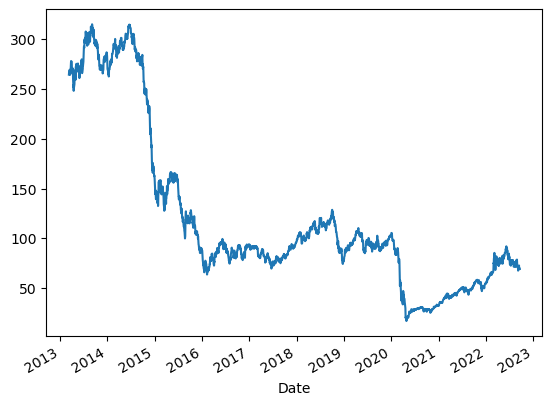

In [9]:
df_final['USO_Adj_Close'].plot()

plt.show()

In [10]:
## Random Forest Regressor

# Reading the data into a pandas DataFrame
df = pd.read_csv('/Users/katerina/Documents/Ironhack/USO_ETF/Ready Datasets/USO_ETF.csv', index_col='Date')

# Extracting the target variable
y = df['USO_Adj_Close']

# Removing the target variable and any irrelevant columns from the feature set
X = df.drop(['USO_Adj_Close','USO_Close','USO_High','USO_Open', 'USO_Low', 'BZ_Open', 'BZ_Close', 'BZ_High', 'BZ_Low', 'BZ_Volume',
       'CL_Open', 'CL_Close', 'CL_High', 'CL_Low', 'CL_Volume'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Printing the results
print(f"Mean Squared Error: {mse}")
print("RMSE is", rmse)
print(f"R-squared Value: {r2}")

Mean Squared Error: 28.752478291600845
RMSE is 5.3621337442850905
R-squared Value: 0.9958039975837197


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
# Extracting the target variable
y = df['USO_Adj_Close']

# Removing the target variable and any irrelevant columns from the feature set
X = df.drop(['USO_Adj_Close','USO_Close','USO_High','USO_Open', 'USO_Low', 'BZ_Open', 'BZ_Close', 'BZ_High', 'BZ_Low', 'BZ_Volume',
       'CL_Open', 'CL_Close', 'CL_High', 'CL_Low', 'CL_Volume'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Printing the results
print(f"Mean Squared Error: {mse}")
print("nRMSE is", rmse)
print(f"R-squared Value: {r2}")

Mean Squared Error: 47.453609823967305
nRMSE is 6.8886580568327895
R-squared Value: 0.9930748417766564


In [12]:
## Prediction Based only on stock prices of 2 energy companies (Petrobas and Exxon Mobil) and 2 indexes (DJ and S&P 500)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
# Extracting the target variable
y = df['USO_Adj_Close']

# Removing the target variable and any irrelevant columns from the feature set

# Deleted all except PBR, XOM, DJIA, SPX
X = df.drop(['BZ_Open', 'BZ_Close', 'BZ_High', 'BZ_Low', 'BZ_Volume',
       'CL_Open', 'CL_Close', 'CL_High', 'CL_Low', 'CL_Volume', 'CVX_Open',
       'CVX_Close', 'CVX_High', 'CVX_Low', 'CVX_Adj_Close', 'CVX_Volume',
       'SHEL_Open', 'SHEL_Close', 'SHEL_High', 'SHEL_Low', 'SHEL_Adj_Close',
       'SHEL_Volume', 'TTE_Open', 'TTE_Close', 'TTE_High', 'TTE_Low', 'TTE_Adj_Close',
       'TTE_Volume', 'USDEUR_Open', 'USDEUR_Close', 'USDEUR_High',
       'USDEUR_Low', 'USDEUR_Adj_Close', 'USDI_Price', 'USDI_Open',
       'USDI_High', 'USDI_Low', 'USO_Open', 'USO_Close', 'USO_High', 'USO_Low',
       'USO_Adj_Close', 'USO_Volume'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Printing the results
print(f"Mean Squared Error: {mse}")
print("nRMSE is", rmse)
print(f"R-squared Value: {r2}")

Mean Squared Error: 137.35302389140878
nRMSE is 11.71977064158718
R-squared Value: 0.979955341091411


In [14]:
## Random Forest Regressor

# Reading the data into a pandas DataFrame
df = pd.read_csv('/Users/katerina/Documents/Ironhack/USO_ETF/Ready Datasets/USO_ETF.csv', index_col='Date')

# Extracting the target variable
y = df['USO_Adj_Close']

# Removing the target variable and any irrelevant columns from the feature set
X = df.drop(['BZ_Open', 'BZ_Close', 'BZ_High', 'BZ_Low', 'BZ_Volume',
       'CL_Open', 'CL_Close', 'CL_High', 'CL_Low', 'CL_Volume', 'CVX_Open',
       'CVX_Close', 'CVX_High', 'CVX_Low', 'CVX_Adj_Close', 'CVX_Volume',
       'SHEL_Open', 'SHEL_Close', 'SHEL_High', 'SHEL_Low', 'SHEL_Adj_Close',
       'SHEL_Volume', 'TTE_Open', 'TTE_Close', 'TTE_High', 'TTE_Low', 'TTE_Adj_Close',
       'TTE_Volume', 'USDEUR_Open', 'USDEUR_Close', 'USDEUR_High',
       'USDEUR_Low', 'USDEUR_Adj_Close', 'USDI_Price', 'USDI_Open',
       'USDI_High', 'USDI_Low', 'USO_Open', 'USO_Close', 'USO_High', 'USO_Low',
       'USO_Adj_Close', 'USO_Volume'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Printing the results
print(f"Mean Squared Error: {mse}")
print("RMSE is", rmse)
print(f"R-squared Value: {r2}")

Mean Squared Error: 83.32482545440746
RMSE is 9.128243284137833
R-squared Value: 0.9878399640755504


Building Linear Regression model using the predictors which are most closely related to the abjusted value (USO_Open, USO_ETF_Low, USO_ETF_High). Obviously, this model will predict USO ETF's Adjusted Close with very good accuracy.

In [77]:
# Save filepath for easier access
file_path = '/Users/katerina/Documents/Ironhack/USO_ETF/Ready Datasets/USO_ETF.csv'

# Read the data with pandas and store it in a dataframe titled gold data
df = pd.read_csv(file_path)

y = df['USO_Adj_Close'] 

# We will start out by selecting features gold ETF features
features = ['USO_Open','USO_High', 'USO_Low', 'USO_Volume']
X = df[features]
X.head()

,USO_Open,USO_High,USO_Low,USO_Volume
0,262.88,265.20,261.60,249738
1,267.68,268.80,265.76,424188
2,268.00,268.48,264.24,422175
3,266.08,267.84,265.84,262925
4,268.88,269.20,267.36,311300


# Create Linear Regression Model

In [16]:
# Define Model
lr_model = LinearRegression()

#Fit Model
lr_model.fit(X, y)

print("Making predicitons for the first 5 entries\n")
print(X.head())
print("\nThe predictions are:\n")
print(lr_model.predict(X.head()))
print("\nThe actual values are:\n")
print(y.head())

Making predicitons for the first 5 entries

   USO_Open  USO_High  USO_Low  USO_Volume
0    262.88    265.20   261.60      249738
1    267.68    268.80   265.76      424188
2    268.00    268.48   264.24      422175
3    266.08    267.84   265.84      262925
4    268.88    269.20   267.36      311300

The predictions are:

[263.75165052 267.11162559 265.46221749 267.35251771 268.01353355]

The actual values are:

0    264.32
1    266.08
2    265.52
3    267.36
4    268.80
Name: USO_Adj_Close, dtype: float64


Just based on the first five predictions. We can see that Linear Regression model fitted to the whole data set is able to predict the adjusted close value within a dollar. We will run the whole model through validation and get its mean absolute error.

# Model Valuation

In [17]:
predicted_adj_close = lr_model.predict(X.head())
print(mean_absolute_error(y.head(),predicted_adj_close))

predicted_adj_close = lr_model.predict(X)
print(mean_absolute_error(y, predicted_adj_close))

0.49034126376881204
0.4884105456881752


# Partitioning Data

Since we did not split up our data into train, test, and validation sets, the above model could be overfitted.

In [18]:
# Partition data into training and validation groups
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define a new model for training set
lr_model = LinearRegression()
# Fit model
lr_model.fit(train_X, train_y)

#get predicted prices on validation data
val_predictions = lr_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

0.49008526796781776


# Creating a Data Pipeline

MAE: 0.49008526796781776


<AxesSubplot:xlabel='USO_Adj_Close'>

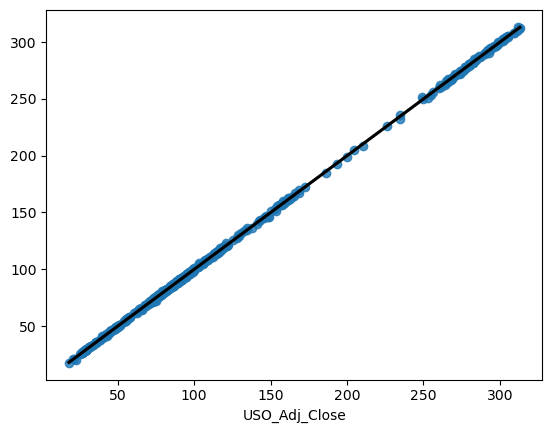

In [19]:
# Bundle preporcessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('lr_model', lr_model)])
# Preprocessing of training data, fit model
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

# Display Model
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"})

# Run Model through Cross-Validation

In [20]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())

rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is",rmse)

r2 = r2_score(val_y, preds)
print("\nr2 score is", r2)

MAE scores:
 [0.72048527 0.79183792 0.80878803 0.50978034 0.31021031 0.41838253
 0.44976277 0.32241189 0.17258142 0.40649363] 

Average MAE score (across all ten folds):
0.49107341108329666

RMSE is 0.6766618776611173

r2 score is 0.9999272834459182


Running the Model through Cross-Validation didn't improve MAE score

# Create a Gradient Boosting Model

In [21]:
gb_model = XGBRegressor()
gb_model.fit(train_X, train_y)

# Make predictions using XGBoost model
predictions = gb_model.predict(val_X)
print("Mean Absolute Error: ",mean_absolute_error(predictions, val_y))

Mean Absolute Error:  0.8481531737925806


This is much worse than our linear regression model. We will need to adjust some of our parameters to make sure we get the best result XGBoost can afford us. We will start by changing:

The number of estimators - the number of times it will go through the modeling cycle.
The early stopping round - the parameter we set to stop the model when our validation score stops improving.
Learning rate - the parameter that means each model will help us less. The lower we set the learning rate, generally, the more accurate our predictions will be.
n_jobs - we would change this to build our models faster. Ideally, you match this to the number of cores on your machine to shorten the amount of time the model is being fit.

/Users/katerina/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error 0.733967918484858

RMSE is 1.1238515805685292

r2 score is 0.9997994106862651


<AxesSubplot:xlabel='USO_Adj_Close'>

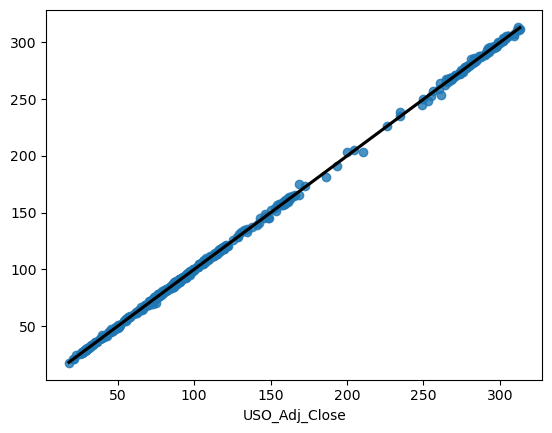

In [22]:
gb_model = XGBRegressor(n_estimators=1000,
                        learning_rate=0.03,
                        n_jobs=4)
gb_model.fit(train_X, train_y,
            early_stopping_rounds=5,
            eval_set=[(val_X, val_y)],
            verbose=False)

predictions = gb_model.predict(val_X)
print("Mean Absolute Error",
      mean_absolute_error(predictions,val_y))

rmse = math.sqrt(mean_squared_error(val_y,predictions))
print("\nRMSE is", rmse)

r2 = r2_score(val_y,predictions)
print("\nr2 score is", r2)

sns.regplot(x=val_y, y=predictions, line_kws={"color": "black"})

In this instance, XGBoost has a MAE of 0.733 and an RMSE of 1,12. The linear regression model gave an average MAE of 0.491 after it was run through ten folds of cross validation and an RMSE of 0.677. The linear regression model is slightly superior to XGBoost when given these parameters and validation techniques.

# Feature Engineering

In [23]:
# Refresh on what all of the features look like
# There are 60 predictor columns. I am not including Adj Close and Close of the 63 total.

plt.style.use("seaborn-whitegrid")

df.head()

,Date,XOM_Open,XOM_Close,XOM_High,XOM_Low,XOM_Adj_Close,XOM_Volume,BZ_Open,BZ_Close,BZ_High,...,USDI_Price,USDI_Open,USDI_High,USDI_Low,USO_Open,USO_Close,USO_High,USO_Low,USO_Adj_Close,USO_Volume
0,2013-03-11,89.01,89.16,89.55,88.54,58.3023,12454800,110.51,110.22,110.66,...,82.57,82.78,82.83,82.52,262.88,264.32,265.20,261.60,264.32,249738
1,2013-03-12,89.45,89.16,89.91,89.01,58.3023,11470000,110.13,109.65,111.18,...,82.58,82.66,82.79,82.41,267.68,266.08,268.80,265.76,266.08,424188
2,2013-03-13,89.02,89.26,89.50,88.83,58.3677,10539900,109.71,108.52,109.82,...,82.89,82.60,83.06,82.33,268.00,265.52,268.48,264.24,265.52,422175
3,2013-03-14,89.41,89.83,89.91,89.41,58.7404,13775500,108.60,109.42,109.94,...,82.61,82.90,83.17,82.43,266.08,267.36,267.84,265.84,267.36,262925
4,2013-03-15,89.20,89.37,89.61,88.79,58.4397,29240100,109.37,109.82,110.52,...,82.13,82.54,82.61,82.05,268.88,268.80,269.20,267.36,268.80,311300


In [24]:
# Create new ds with all predictor features. Take Adj Close as Y
# Remove Close because it is too close to Adj Close
X = df.copy()
y = X.pop('USO_Adj_Close')
date = X.pop('Date')
X.pop('USO_Close')

0       264.32
1       266.08
2       265.52
3       267.36
4       268.80
         ...  
2396     72.73
2397     69.76
2398     69.90
2399     70.05
2400     69.22
Name: USO_Close, Length: 2401, dtype: float64

In [25]:
# Create mutual info scores

def make_mi_scores (X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

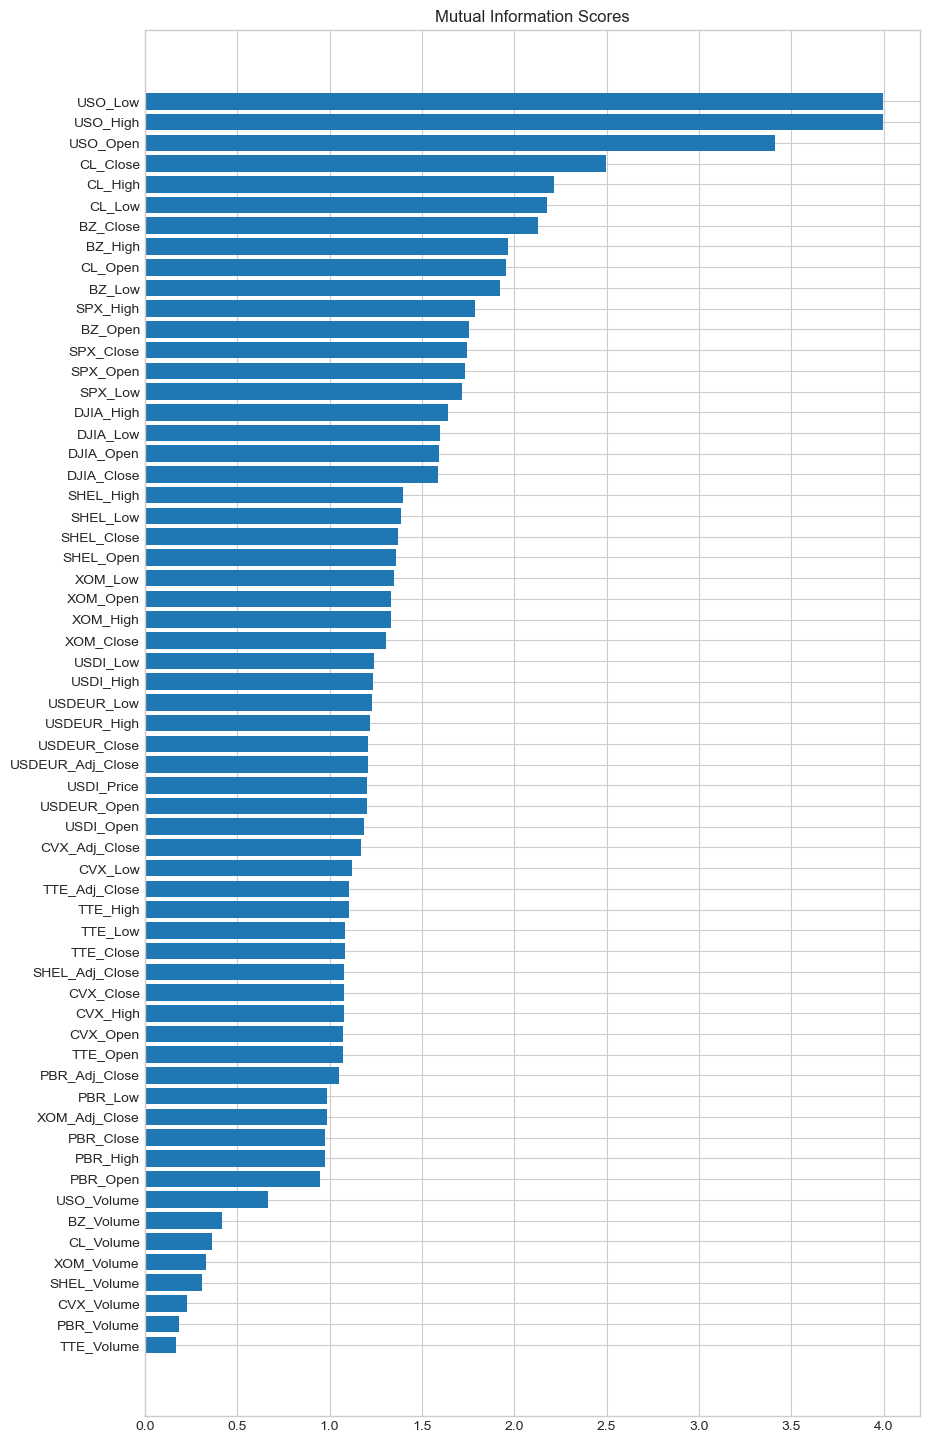

In [26]:
# Construct a bar plot to show each feature's score.

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(10,18))
plot_mi_scores(mi_scores)

No wonder our earlier models performed so well. We were already using the best predictors: High, Low, and Open. The predictor we used that has very low mutual information is Volume. In fact, Volume has a lower mutual information than other volumes for stock market indicies. Thanks to the graph above, we can drop Volume as a predictor and perhaps add in higher ranking predictors such as CL_High and CL_Close. It seems that the volume and trend categories of predictors always have a lower MI score than any high, low, or open predictor.

High, Low and Open are extremely correlated to the Adj Close value. Let's create simple regplots to magnify their relationships. You will see that as their mutual information rank gets lower, the less correlated that feature's regplot is with adjusted close.

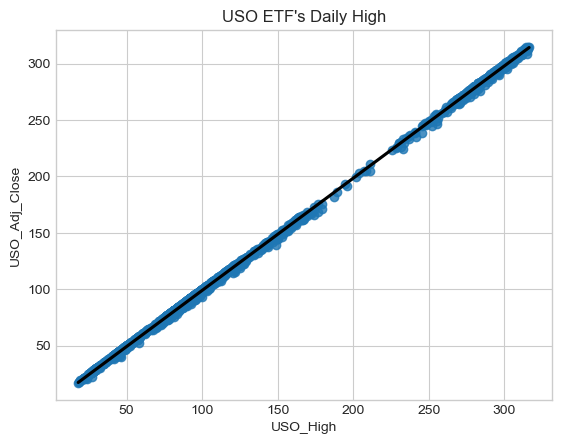

In [27]:
daily_high = sns.regplot(x="USO_High", y="USO_Adj_Close", data=df, line_kws={"color": "black"}).set(title="USO ETF's Daily High")

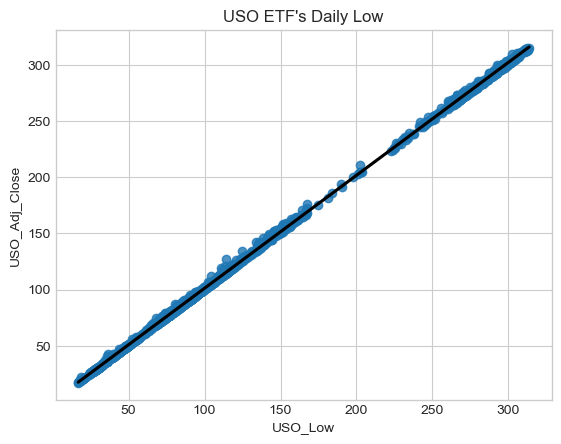

In [28]:
daily_low = sns.regplot(x="USO_Low", y="USO_Adj_Close", data=df, line_kws={"color": "black"}).set(title="USO ETF's Daily Low")

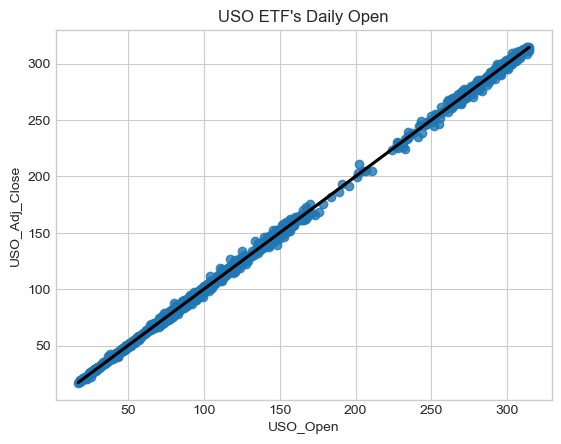

In [29]:
daily_close = sns.regplot(x="USO_Open", y="USO_Adj_Close", data=df, line_kws={"color": "black"}).set(title="USO ETF's Daily Open")

We can see that these three native features are very good predictors for the adjusted close price. However, what if we can create a new feature that can lend a little more insight into the price of USO ETF. In the code below, we will create a feature called "daily change" by taking the price difference from open and close. Daily change is useless as a predictor on its own, but maybe we can apply it to time-series data to see any trends. Daily change is a way to track the volatility of USO ETF prices.

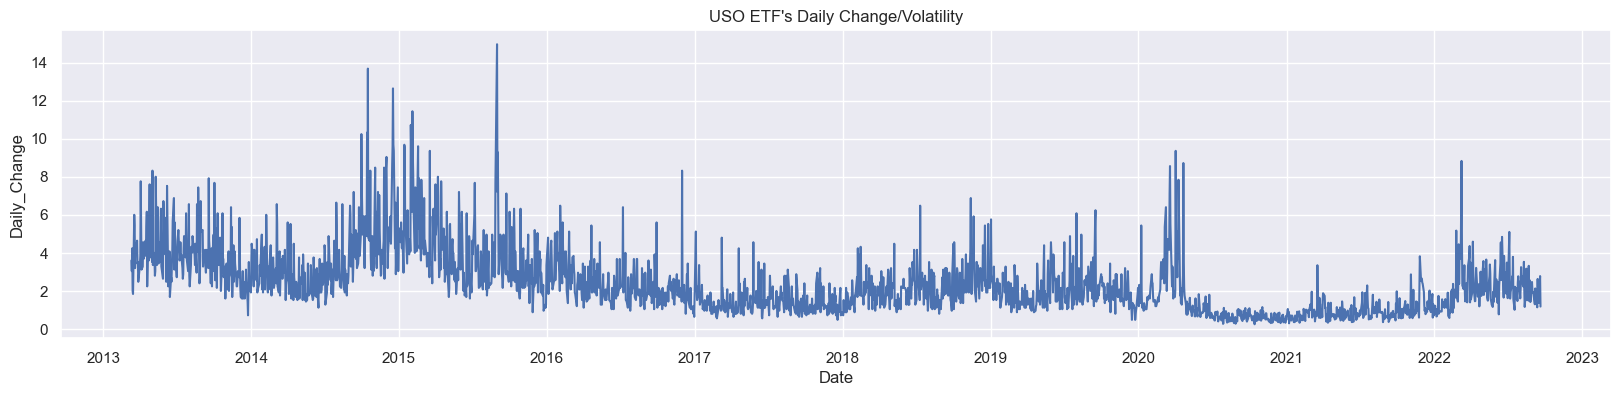

In [30]:
df["Daily_Change"] = abs(X.USO_High - X.USO_Low)

# Convert Date from string to datetime to give us yearly ticks on the X-axis
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Daily_Change", data=df).set(title="USO ETF's Daily Change/Volatility")

We can see that USO ETF prices have gotten less volatile since september 2015. Around after mid-2020, USO ETF prices seem to have become even less volatile to the end of 2021. If we were to split up the data from 2013-2016 and 2019-2022 and run them through our linear regression model, we would get better performance from the 2019-2022 dataset because the prices have less daily variation than the 2013-2016 subset. The main takeaway USO ETF prices volatility has decreased overtime. However, the Adjusted Close has also gone down, as visualized below.

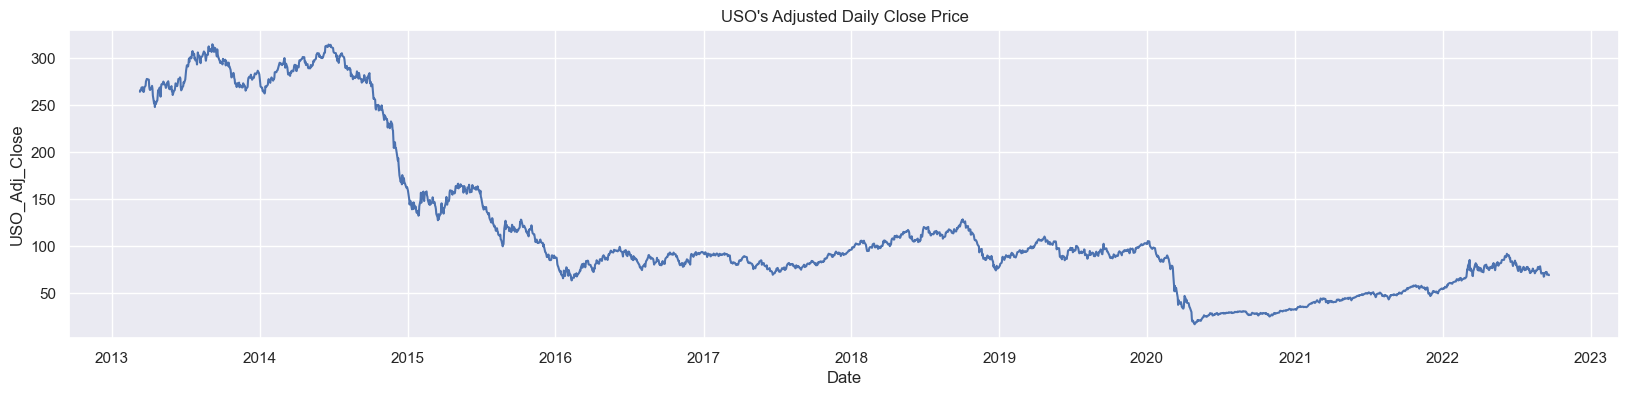

In [31]:
# Adjusted Close with Time Series
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="USO_Adj_Close", data=df).set(title="USO's Adjusted Daily Close Price")

Next we'll apply principal component analysis (PCA). PCA will be good to use with this dataset for two reasons.

The first is that PCA works well with numeric features. All of our features, with the exception of Date, are numeric features.
Many of our features are redundant and are closely related mutual information scores. A lot of them can be removed or combined to create principal components. We already know that High, Low, and Open have the highest mutual information scores. We also know that those features alone produce a high-performing linear regression model. To experiment with something new. We will use 12 features which are Prices of Shell PLC and Prices of Market Indexes DJ and S&P 500 

In [70]:
features = ["SPX_High", "SPX_Close", "SPX_Low", "SPX_Open", "SHEL_High", "SHEL_Close", "SHEL_Low", "SHEL_Open","DJIA_High", "DJIA_Low", "DJIA_Open", "DJIA_Close"]
#features = ["SPX_High", "SPX_Close", "SPX_Low", "SPX_Open", "SHEL_High", "DJIA_Open"]

X = df.copy()
y = X.pop('USO_Adj_Close')
date = X.pop('Date')
X.pop('USO_Close')
X = X.loc[:, features]

# Standardize the new df. PCA is sensitive to scale.
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [71]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range (X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-4.243912,0.378096,0.044268,-0.012157,-0.013464,0.002591,0.013439,-0.000760,-0.002708,-0.001074,-0.001206,0.000151
1,-4.234392,0.378975,0.038296,0.001401,-0.024055,0.007906,0.015222,-0.000195,-0.002023,-0.003030,-0.001573,0.000429
2,-4.219573,0.408851,0.035862,-0.008298,-0.018146,0.002111,0.014417,-0.006199,0.002903,0.001278,-0.001663,-0.000186
3,-4.240402,0.324016,0.039482,-0.022251,0.002833,-0.008272,0.001823,0.003590,-0.002345,-0.000720,-0.000761,-0.000058
4,-4.204793,0.376236,0.035514,-0.012651,-0.009929,-0.013401,0.009198,-0.007647,0.001634,0.000409,-0.000976,-0.000291


In [72]:
# Wrap the PCA loadings up in a dataframe
loadings = pd.DataFrame(
    pca.components_.T,       # Transpose the matrix of loadings
    columns=component_names, # to turn columns into principal components
    index = X.columns,       # and the rows are original features, so we can identify them
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
SPX_High,0.315814,-0.144730,0.364303,0.181494,0.296255,0.000777,0.272388,0.270055,0.200198,0.155865,-0.510436,-0.392235
SPX_Close,0.315655,-0.146150,0.359248,-0.311120,0.167649,0.330265,0.022451,-0.233633,-0.349051,0.341731,-0.025598,0.470750
SPX_Low,0.315474,-0.147906,0.353639,-0.188357,-0.357419,-0.013236,-0.305093,0.188015,0.186051,0.145509,0.535001,-0.345966
SPX_Open,0.315662,-0.146118,0.359195,0.316815,-0.126116,-0.310708,0.017707,-0.224776,-0.038028,-0.642867,0.005802,0.267532
SHEL_High,-0.231825,-0.442525,0.031729,0.177744,0.348097,-0.056740,-0.580908,0.351424,-0.357787,-0.063082,-0.020478,0.008660
SHEL_Close,-0.231990,-0.442118,0.029413,-0.417278,0.273209,-0.445589,0.032817,-0.368323,0.401655,0.065851,0.011352,0.001654
SHEL_Low,-0.232011,-0.442157,0.015470,-0.165772,-0.419225,-0.092033,0.554430,0.316251,-0.360755,-0.034196,0.002642,-0.001209
SHEL_Open,-0.231789,-0.442514,0.018322,0.407817,-0.198534,0.594629,-0.001408,-0.298963,0.316678,0.031643,0.007633,-0.008941
DJIA_High,0.311128,-0.179450,-0.344591,0.206789,0.338052,0.000363,0.289677,0.340175,0.257266,0.057360,0.456125,0.343591
DJIA_Low,0.310422,-0.183760,-0.349712,-0.207975,-0.395566,-0.019601,-0.316105,0.209651,0.263541,0.006841,-0.493069,0.301610


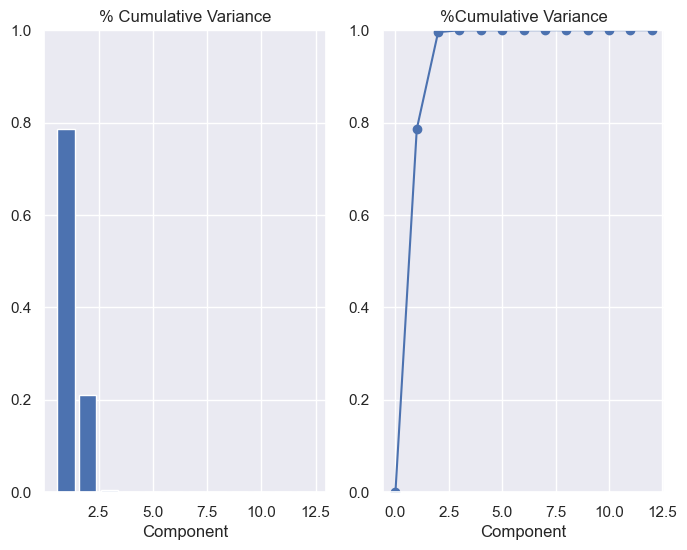

In [73]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1,2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0,cv], "o-")
    axs[1].set(
        xlabel="Component", title="%Cumulative Variance", ylim=(0.0,1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

# Look at the explained variance from PCA
plot_variance(pca);

We can see principal component 1 (PC1) is the most informative by far. A disparity is expected usually between PC1 and the remainders. However, this is a high disparity. If we didn't look at our features through mutual information earlier this would raise concern. However, we already know that the first three features are highly correlated with our target feature of adjusted close, so these results make sense.

In [74]:
# View MI Scores for the principal components
mi_scores = make_mi_scores(X_pca, y)
mi_scores

PC1     1.816726
PC3     1.198041
PC2     1.082018
PC11    0.155488
PC5     0.136843
PC10    0.135789
PC7     0.090313
PC12    0.084314
PC4     0.067230
PC8     0.046111
PC9     0.031635
PC6     0.025920
Name: MI Scores, dtype: float64

# New Data Pipeline with PCA

Now that we can see how worthy each principal component is, we can better determine which ones we should add to our new pipeline. In this instance, we will include all prinicpal components in our new pipeline 

MAE: 30.116403988184064


[Text(0.5, 1.0, 'Linear Regression with PCA')]

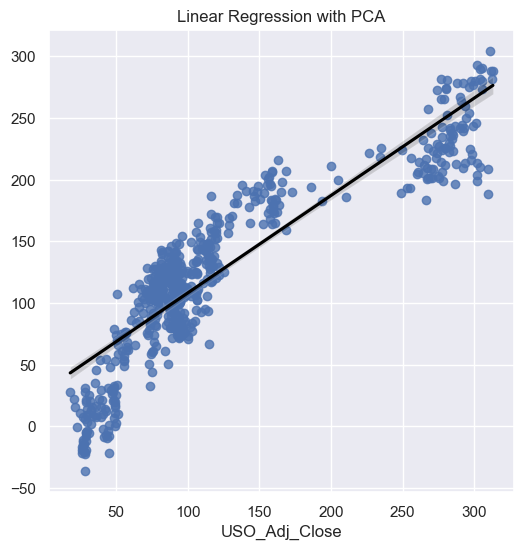

In [75]:
# Partition the PCA dataframe into training and validation groups
train_X, val_X, train_y, val_y = train_test_split(X_pca, y, random_state = 0)

lr_model = LinearRegression()

# Bundle preporcessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('lr_model', lr_model)])
# Preprocessing of training data, fit model
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

# Display Model
sns.set(rc={"figure.figsize":(6,6)})
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"}).set(title="Linear Regression with PCA")


Let's run the new pipeline through cross-validation to get a more accurate score.

In [76]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X_pca, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average M((AE score (across all ten folds):")
print(scores.mean())
rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is", rmse)
r2 = r2_score(val_y,preds)
print("\nr2 score is", r2)

MAE scores:
 [97.28343442 34.38832122 37.59617986 55.99959522 42.25940137 30.43904304
 12.07637572 39.21096522 54.36863405 61.82302823] 

Average M((AE score (across all ten folds):
46.54449783414294

RMSE is 35.72013717510537

r2 score is 0.7973642317860798


Running the PCA model through ten-fold cross validation didn't improve the model performance

# Three Models Performance Results

In [64]:
results = [['Linear Regression', 0.491, 0.677, 0.999],
           ['Gradient Boosting (XGBoost)', 0.734, 1.124, 0.999],
           ['Linear Regression with PCA', 0.482, 0.622, 0.999]]
results_df = pd.DataFrame(results, columns = ['Model Type', 'MAE', 'RMSE', 'r2'])
results_df

,Model Type,MAE,RMSE,r2
0,Linear Regression,0.491,0.677,0.999
1,Gradient Boosting (XGBoost),0.734,1.124,0.999
2,Linear Regression with PCA,0.482,0.622,0.999


Random Forest Regressor came first, Linear regression with PCA came in second, XGBoost came in last this time. Although there is variation in performance, the three models perform quite well.